In [2]:
import sys
import pandas as pd
sys.path.append(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\Functions')
import Influencer_Characteristics as ic
import File_Opening as fo

C:\Users\I6240624\AppData\Local\Temp\ipykernel_19460\3180485830.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
dftt_en= fo.read_data(r'C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Notebooks/samplettnl.csv')
dfins_en= fo.read_data(r'C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Notebooks/sampleinsnl.csv')
dfyt_en = fo.read_data(r'C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Notebooks/sampleytnl.csv')

In [5]:
#dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\Notebooks\sampleins.csv')
#dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\samplett.csv')
#dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\sampleyt.csv')

In [7]:
# Open the data
yten= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Content_Aware_t=1_p=1_YouTube_Dutch.csv')
tten= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Content_Aware_t=1_p=1_TikTok_Dutch.csv')
insen= fo.read_data_ai('C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Content_Aware_t=1_p=1_Instagram_Dutch.csv')


In [5]:
# Applying the functions to the first column of the 'tten' dataset
tten['mentions'] = tten[0].apply(lambda x: ic.extract_mentions(x))
tten['urls'] = tten[0].apply(lambda x: ic.extract_urls(x))
tten['hashtags'] = tten[0].apply(lambda x: ic.extract_hashtags(x))
tten['emojis'] = tten[0].apply(lambda x: ic.extract_emojis(x))

insen['mentions'] = insen[0].apply(lambda x: ic.extract_mentions(x))
insen['urls'] = insen[0].apply(lambda x: ic.extract_urls(x))
insen['hashtags'] = insen[0].apply(lambda x: ic.extract_hashtags(x))
insen['emojis'] = insen[0].apply(lambda x: ic.extract_emojis(x))

yten['mentions'] = yten[0].apply(lambda x: ic.extract_mentions(x))
yten['urls'] = yten[0].apply(lambda x: ic.extract_urls(x))
yten['hashtags'] = yten[0].apply(lambda x: ic.extract_hashtags(x))
yten['emojis'] = yten[0].apply(lambda x: ic.extract_emojis(x))

In [6]:
columns_to_split = ['mentions', 'hashtags', 'urls', 'emojis']

tten=ic.split_columns(tten, columns_to_split)

yten=ic.split_columns(yten, columns_to_split)

insen=ic.split_columns(insen, columns_to_split)

In [7]:
dfins_en

,caption
1,Vlaamse vrienden🇧🇪
2,Zieke #tb met dee
3,Dikke vette peace ✌
4,Dit is één van de eindbazen die mij vandaag he...
5,Die bekende golden hour foto’s lijken allemaal...
...,...
1046,Zaterdag is het weer zover! Dit team van power...
1047,Knolpower💪 (Mijn snapchat: UberQuinGames)
1048,Nu online op StukTV! In de nieuwe aflevering v...
1049,Van de week hebben @dylanpeys en ik de videocl...


In [8]:
dfins_en['mentions'] = dfins_en["caption"].apply(lambda x: ic.extract_mentions(x))
dfins_en['urls'] = dfins_en["caption"].apply(lambda x: ic.extract_urls(x))
dfins_en['hashtags'] = dfins_en["caption"].apply(lambda x: ic.extract_hashtags(x))
dfins_en['emojis'] = dfins_en["caption"].apply(lambda x: ic.extract_emojis(x))

dftt_en['mentions'] = dftt_en["video_description"].apply(lambda x: ic.extract_mentions(x))
dftt_en['urls'] = dftt_en["video_description"].apply(lambda x: ic.extract_urls(x))
dftt_en['hashtags'] = dftt_en["video_description"].apply(lambda x: ic.extract_hashtags(x))
dftt_en['emojis'] = dftt_en["video_description"].apply(lambda x: ic.extract_emojis(x))

dfyt_en['mentions'] = dfyt_en["description_video"].apply(lambda x: ic.extract_mentions(x))
dfyt_en['urls'] = dfyt_en["description_video"].apply(lambda x: ic.extract_urls(x))
dfyt_en['hashtags'] = dfyt_en["description_video"].apply(lambda x: ic.extract_hashtags(x))
dfyt_en['emojis'] = dfyt_en["description_video"].apply(lambda x: ic.extract_emojis(x))

In [9]:
columns_to_split = ['mentions', 'hashtags', 'urls', 'emojis']

dfins_en=ic.split_columns(dfins_en, columns_to_split)

dftt_en=ic.split_columns(dftt_en, columns_to_split)

dfyt_en=ic.split_columns(dfyt_en, columns_to_split)

In [10]:
dfyt_en=dfyt_en.rename(columns={'description_video': 'caption'})

dftt_en=dftt_en.rename(columns={'video_description': 'caption'})

insen=insen.rename(columns={0: 'caption'})

yten=yten.rename(columns={0: 'caption'})

tten=tten.rename(columns={0: 'caption'})

In [11]:
dfins_en['mentions_count'] = dfins_en['mentions'].apply(lambda x: len(x))
dfins_en['hashtags_count'] = dfins_en['hashtags'].apply(lambda x: len(x))
dfins_en['urls_count'] = dfins_en['urls'].apply(lambda x: len(x))
dfins_en['emojis_count'] = dfins_en['emojis'].apply(lambda x: len(x))
dfins_en['caption_length'] = dfins_en['caption'].apply(lambda x: len(x))

dftt_en['mentions_count'] = dftt_en['mentions'].apply(lambda x: len(x))
dftt_en['hashtags_count'] = dftt_en['hashtags'].apply(lambda x: len(x))
dftt_en['urls_count'] = dftt_en['urls'].apply(lambda x: len(x))
dftt_en['emojis_count'] = dftt_en['emojis'].apply(lambda x: len(x))
dftt_en['caption_length'] = dftt_en['caption'].apply(lambda x: len(x))

dfyt_en['mentions_count'] = dfyt_en['mentions'].apply(lambda x: len(x))
dfyt_en['hashtags_count'] = dfyt_en['hashtags'].apply(lambda x: len(x))
dfyt_en['urls_count'] = dfyt_en['urls'].apply(lambda x: len(x))
dfyt_en['emojis_count'] = dfyt_en['emojis'].apply(lambda x: len(x))
dfyt_en['caption_length'] = dfyt_en['caption'].apply(lambda x: len(x))

tten['mentions_count'] = tten['mentions'].apply(lambda x: len(x))
tten['hashtags_count'] = tten['hashtags'].apply(lambda x: len(x))
tten['urls_count'] = tten['urls'].apply(lambda x: len(x))
tten['emojis_count'] = tten['emojis'].apply(lambda x: len(x))
tten['caption_length'] = tten['caption'].apply(lambda x: len(x))

yten['mentions_count'] = yten['mentions'].apply(lambda x: len(x))
yten['hashtags_count'] = yten['hashtags'].apply(lambda x: len(x))
yten['urls_count'] = yten['urls'].apply(lambda x: len(x))
yten['emojis_count'] = yten['emojis'].apply(lambda x: len(x))
yten['caption_length'] = yten['caption'].apply(lambda x: len(x))

insen['mentions_count'] = insen['mentions'].apply(lambda x: len(x))
insen['hashtags_count'] = insen['hashtags'].apply(lambda x: len(x))
insen['urls_count'] = insen['urls'].apply(lambda x: len(x))
insen['emojis_count'] = insen['emojis'].apply(lambda x: len(x))
insen['caption_length'] = insen['caption'].apply(lambda x: len(x))


In [12]:
# Call the function to get the DataFrame
hashtag_unique = ic.get_unique_counts(dfins_en, dftt_en, dfyt_en, "hashtags")
mention_unique = ic.get_unique_counts(dfins_en, dftt_en, dfyt_en, "mentions")
url_unique = ic.get_unique_counts(dfins_en, dftt_en, dfyt_en, "urls")
emoji_unique = ic.get_unique_counts(dfins_en, dftt_en, dfyt_en, "emojis")
df_unique_real = pd.concat([hashtag_unique, mention_unique, url_unique, emoji_unique], axis=1)
df_unique_real

,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts
0,Instagram,1019,Instagram,340,Instagram,22,Instagram,594
1,TikTok,1038,TikTok,282,TikTok,1,TikTok,494
2,YouTube,187,YouTube,79,YouTube,2712,YouTube,143


In [13]:
hashtag_unique = ic.get_unique_counts(insen, tten, yten,  "hashtags")
mention_unique = ic.get_unique_counts(insen, tten, yten,  "mentions")
url_unique = ic.get_unique_counts(insen, tten, yten,  "urls")
emoji_unique = ic.get_unique_counts(insen, tten, yten,  "emojis")
df_unique_ai = pd.concat([hashtag_unique, mention_unique, url_unique, emoji_unique], axis=1)
df_unique_ai

,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts
0,Instagram,1011,Instagram,149,Instagram,9,Instagram,589
1,TikTok,1385,TikTok,190,TikTok,1,TikTok,566
2,YouTube,728,YouTube,65,YouTube,842,YouTube,375


In [14]:
hashtag_avg = ic.get_avg_counts(insen, tten, yten, "hashtags")
url_avg = ic.get_avg_counts(insen, tten, yten, "urls")
mention_avg = ic.get_avg_counts(insen, tten, yten, "mentions")
emoji_avg = ic.get_avg_counts(insen, tten, yten, "emojis")
df_avg_ai = pd.concat([hashtag_avg, mention_avg, url_avg, emoji_avg], axis=1)
df_avg_ai

,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts
0,Instagram,1.568942,Instagram,0.195448,Instagram,0.010710,Instagram,2.013387
1,TikTok,2.000000,TikTok,0.225694,TikTok,0.000000,TikTok,1.894676
2,YouTube,1.495352,YouTube,0.090305,YouTube,1.366534,YouTube,1.365206


In [15]:
hashtag_avg = ic.get_avg_counts(dfins_en, dftt_en, dfyt_en, "hashtags")
mention_avg = ic.get_avg_counts(dfins_en, dftt_en, dfyt_en, "mentions")
url_avg = ic.get_avg_counts(dfins_en, dftt_en, dfyt_en, "urls")
emoji_avg = ic.get_avg_counts(dfins_en, dftt_en, dfyt_en, "emojis")
df_avg_real = pd.concat([hashtag_avg, mention_avg, url_avg, emoji_avg], axis=1)
df_avg_real

,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts
0,Instagram,1.321905,Instagram,0.333333,Instagram,0.020000,Instagram,1.441905
1,TikTok,1.957143,TikTok,0.346667,TikTok,0.000000,TikTok,1.439048
2,YouTube,0.354286,YouTube,0.141905,YouTube,12.652381,YouTube,0.896190


In [16]:
hashtag_avg = ic.get_percentage_counts_total(insen, tten, yten,dfins_en, dftt_en, dfyt_en, "hashtags")
mention_avg = ic.get_percentage_counts_total(insen, tten, yten,dfins_en, dftt_en, dfyt_en, "mentions")
url_avg = ic.get_percentage_counts_total(insen, tten, yten,dfins_en, dftt_en, dfyt_en, "urls")
emoji_avg = ic.get_percentage_counts_total(insen, tten, yten,dfins_en, dftt_en, dfyt_en, "emojis")
df_comp = pd.concat([hashtag_avg, mention_avg, url_avg, emoji_avg], axis=1)
df_comp

,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts,Platform,Unique Counts
0,Instagram,0.498030,Instagram,0.304703,Instagram,0.290323,Instagram,0.497887
1,TikTok,0.571605,TikTok,0.402542,TikTok,0.500000,TikTok,0.533962
2,YouTube,0.795628,YouTube,0.451389,YouTube,0.236916,YouTube,0.723938


In [ ]:
# Plot the unique values
ic.plot_unique(insen,tten,yten,dfins_en,dftt_en,dfyt_en,"urls")
ic.plot_unique(insen,tten,yten,dfins_en,dftt_en,dfyt_en,"mentions")
ic.plot_unique(insen,tten,yten,dfins_en,dftt_en,dfyt_en,"hashtags")
ic.plot_unique(insen,tten,yten,dfins_en,dftt_en,dfyt_en,"emojis")

In [ ]:
ic.draw_network_row(dfins_en, "hashtags", 'Real Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(dftt_en, "hashtags", 'Real TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(dfyt_en, "hashtags", 'Real Youtube English', k_value=0.2, node_size=2,
        edge_color='grey', alpha=0.7, edge_weight=0.2)                   
ic.draw_network_row(insen, "hashtags", 'AI Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(tten, "hashtags", 'AI TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(yten, "hashtags", 'AI Youtube English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)


In [ ]:
ic.draw_network_row(dfins_en, "mentions", 'Real Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(dftt_en, "mentions", 'Real TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(dfyt_en, "mentions", 'Real Youtube English', k_value=0.2, node_size=2,
        edge_color='grey', alpha=0.7, edge_weight=0.2)                   
ic.draw_network_row(insen, "mentions", 'AI Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(tten, "mentions", 'AI TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)
ic.draw_network_row(yten, "mentions", 'AI Youtube English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.1)

In [ ]:
ic.draw_network_row(dfins_en, "emojis", 'Real Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(dftt_en, "emojis", 'Real TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(dfyt_en, "emojis", 'Real Youtube English', k_value=0.2, node_size=2,
        edge_color='grey', alpha=0.7, edge_weight=0.2)                   
ic.draw_network_row(insen, "emojis", 'AI Instagram English', k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(tten, "emojis", 'AI TikTok English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(yten, "emojis", 'AI Youtube English', k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)

In [ ]:
ic.draw_network_row(dfins_en, "urls", 'Real Instagram English', k_value=0.2, node_size=1,
                         edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(dftt_en, "urls", 'Real TikTok English', k_value=0.2, node_size=1,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(dfyt_en, "urls", 'Real Youtube English', k_value=0.2, node_size=1,
        edge_color='grey', alpha=0.7, edge_weight=0.2)                   
ic.draw_network_row(insen, "urls", 'AI Instagram English', k_value=0.2, node_size=1,
                         edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(tten, "urls", 'AI TikTok English', k_value=0.2, node_size=1,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)
ic.draw_network_row(yten, "urls", 'AI Youtube English', k_value=0.2, node_size=1,
                            edge_color='grey', alpha=0.7, edge_weight=0.01)

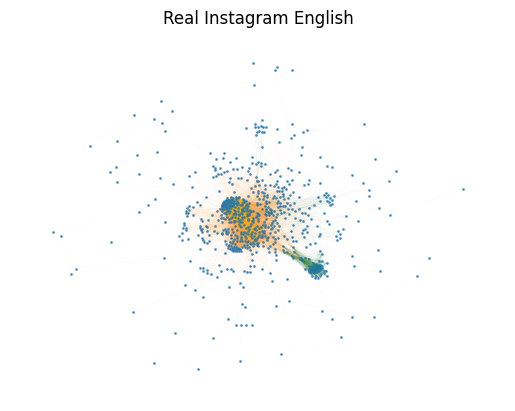

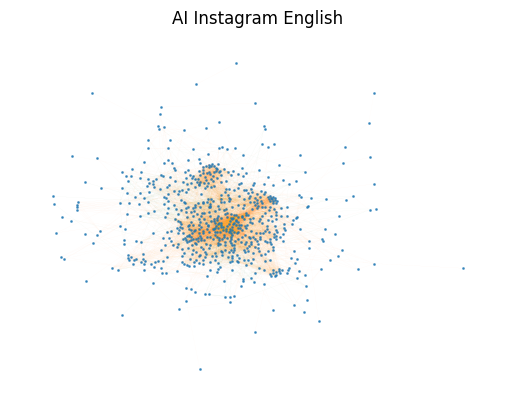

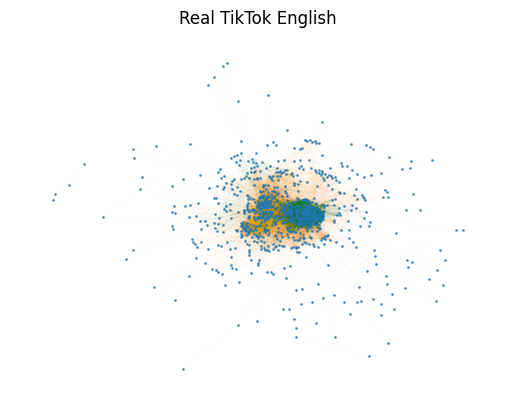

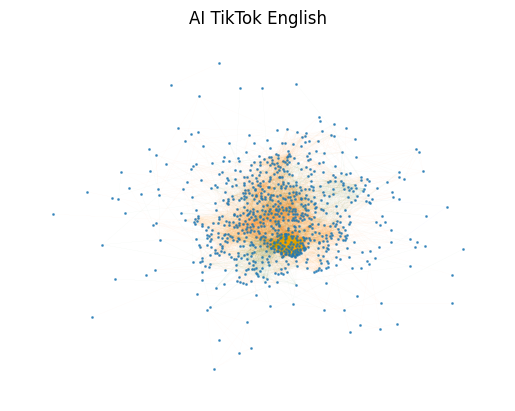

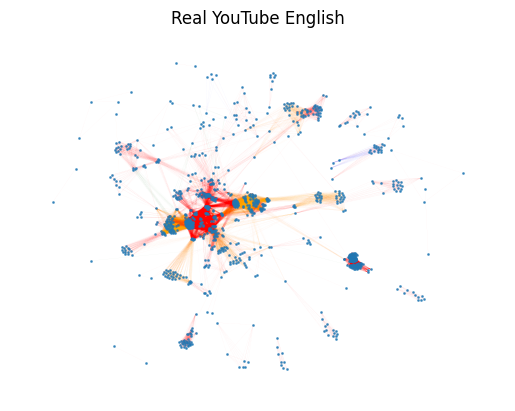

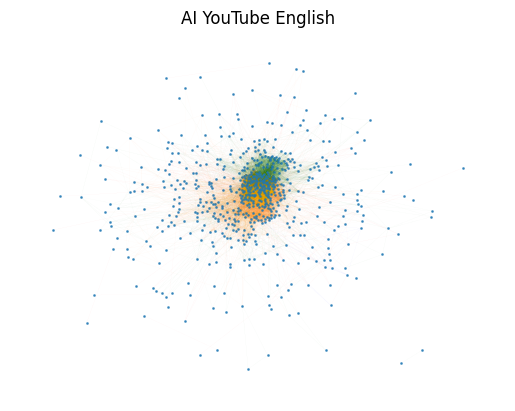

In [18]:
ic.draw_multiple_columns(dfins_en, "hashtags", "mentions", "urls", "emojis",'Real Instagram English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

ic.draw_multiple_columns(insen, "hashtags", "mentions","urls", "emojis", 'AI Instagram English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

ic.draw_multiple_columns(dftt_en, "hashtags", "mentions","urls", "emojis", 'Real TikTok English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

ic.draw_multiple_columns(tten, "hashtags", "mentions","urls", "emojis", 'AI TikTok English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

ic.draw_multiple_columns(dfyt_en, "hashtags", "mentions","urls", "emojis", 'Real YouTube English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

ic.draw_multiple_columns(yten, "hashtags", "mentions","urls", "emojis", 'AI YouTube English', k_value=0.2, node_size=1, alpha=0.7, edge_weight=0.01)

In [ ]:
ic.draw_network(dfins_en, "hashtags", 'Real Instagram English', sample_size=None, k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(insen, "hashtags", 'AI Instagram English', sample_size=None, k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(dftt_en, "hashtags", 'Real TikTok English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(tten, "hashtags", 'AI TikTok English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(dfyt_en, "hashtags", 'Real Youtube English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(yten, "hashtags", 'AI Youtube English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)

In [ ]:
ic.draw_network(dfins_en, "mentions", 'Real Instagram English', sample_size=None, k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(insen, "mentions", 'AI Instagram English', sample_size=None, k_value=0.2, node_size=2,
                         edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(dftt_en, "mentions", 'Real TikTok English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(tten, "mentions", 'AI TikTok English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(dfyt_en, "mentions", 'Real Youtube English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)
ic.draw_network(yten, "mentions", 'AI Youtube English', sample_size=None, k_value=0.2, node_size=2,
                            edge_color='grey', alpha=0.7, edge_weight=0.2)

In [ ]:
# Save the data
#tten.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ttenchar_cat1p1.csv', index=False)
#yten.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\ytenchar_cat1p1.csv', index=False)
#insen.to_csv(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\insenchar_cat1p1.csv', index=False)